In [ ]:
# ------------------------------------------------------------
# Practical Assignment 1 - Data Visualization using Python
# Dataset: Iris Dataset (UCI Machine Learning Repository)
# ------------------------------------------------------------

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import plotly.express as px

In [ ]:
# Step 2: Load Dataset
iris_data = load_iris()
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Step 3: Check data info
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.3000

In [ ]:
# Step 4: Handle Missing Values (Iris has none)
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [ ]:
# ------------------------------------------------------------
# Step 5: Visualization Techniques
# ------------------------------------------------------------
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

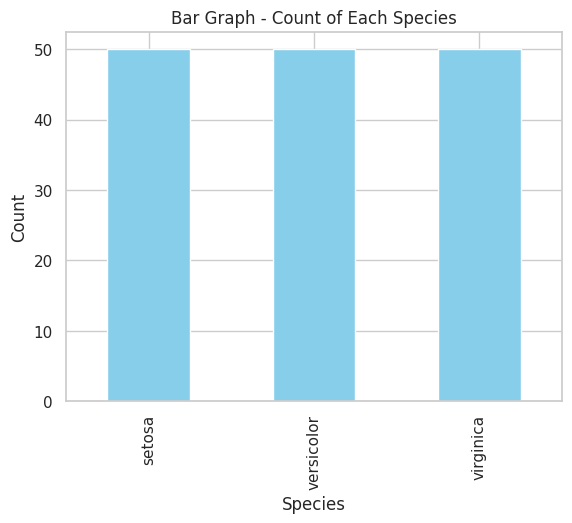

In [ ]:
# a) Bar Graph
species_count = df['species'].value_counts()
species_count.plot(kind='bar', color='skyblue')
plt.title('Bar Graph - Count of Each Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

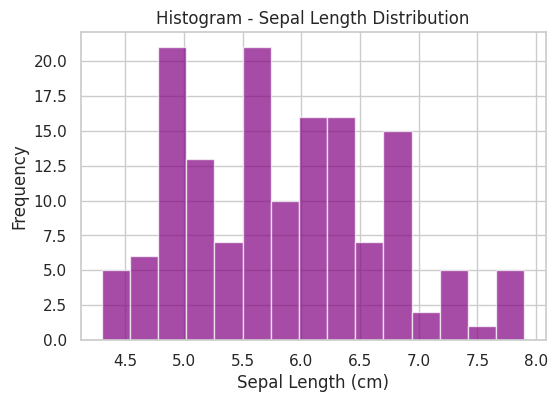

In [ ]:
# b) Histogram
plt.figure(figsize=(6,4))
plt.hist(df['sepal length (cm)'], bins=15, color='purple', alpha=0.7)
plt.title('Histogram - Sepal Length Distribution')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

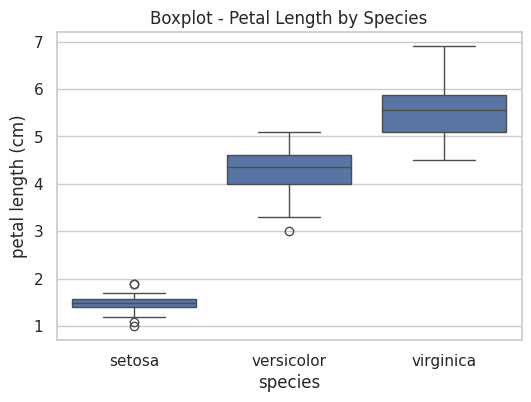

In [ ]:
# c) Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title('Boxplot - Petal Length by Species')
plt.show()

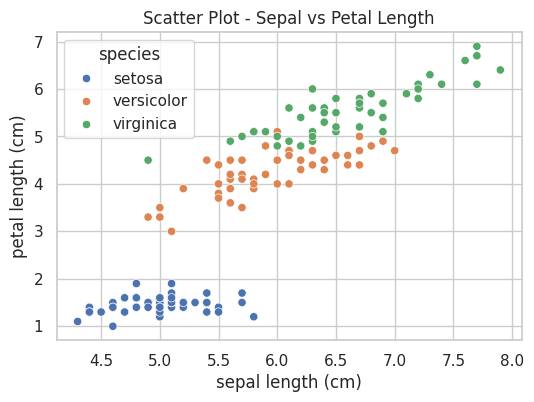

In [ ]:
# d) Scatter Plot
plt.figure(figsize=(6,4))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=df)
plt.title('Scatter Plot - Sepal vs Petal Length')
plt.show()

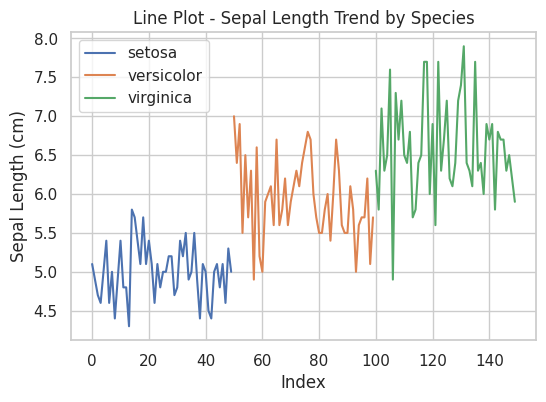

In [ ]:
# e) Line Plot
plt.figure(figsize=(6,4))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.plot(subset.index, subset['sepal length (cm)'], label=species)
plt.legend()
plt.title('Line Plot - Sepal Length Trend by Species')
plt.xlabel('Index')
plt.ylabel('Sepal Length (cm)')
plt.show()

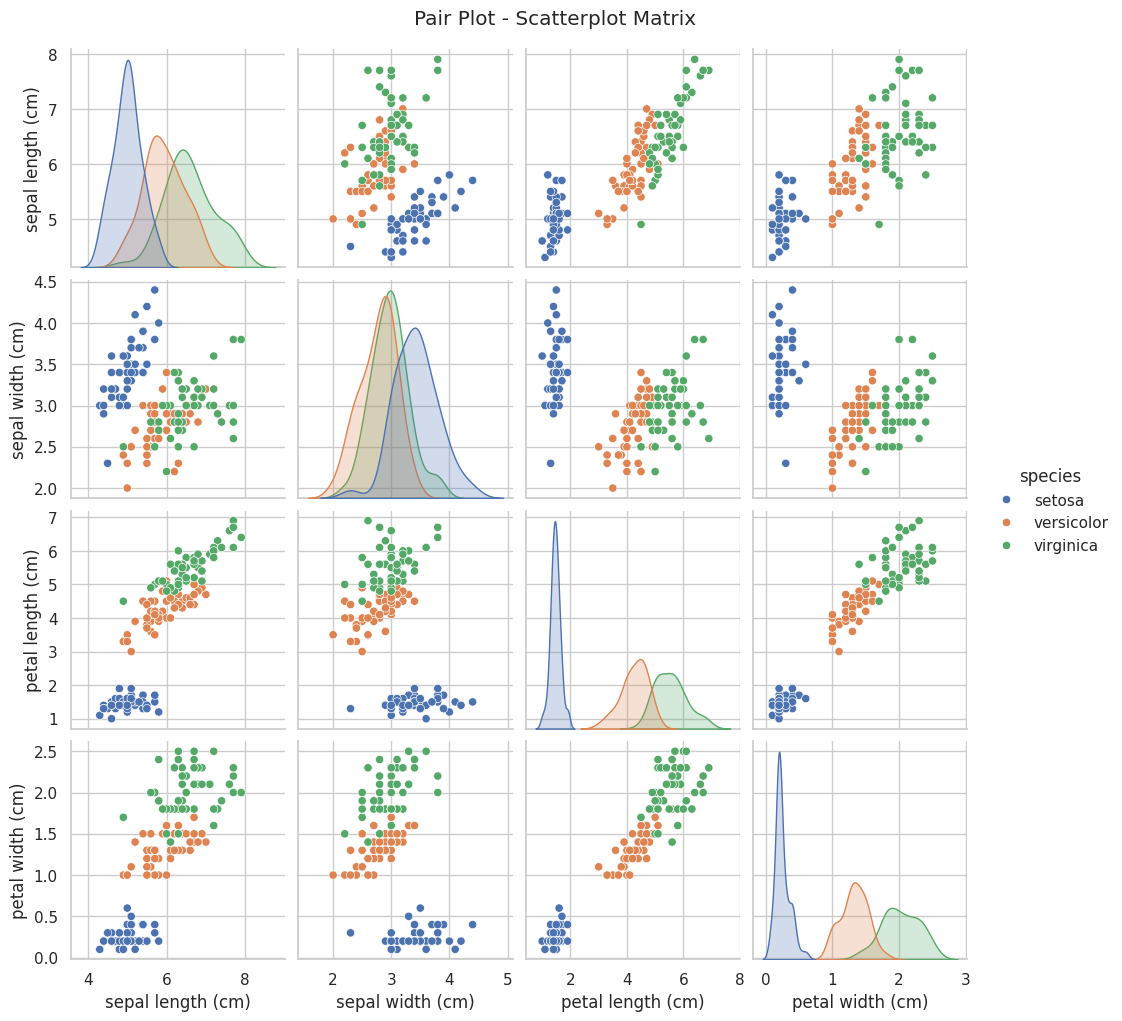

In [ ]:
# f) Pair Plot
sns.pairplot(df, hue='species')
plt.suptitle('Pair Plot - Scatterplot Matrix', y=1.02)
plt.show()

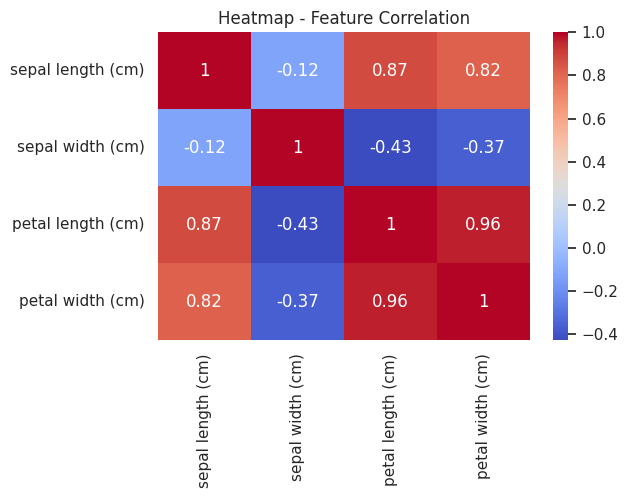

In [ ]:
# g) Heatmap (Correlation)
plt.figure(figsize=(6,4))
sns.heatmap(df.drop(columns='species').corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap - Feature Correlation')
plt.show()

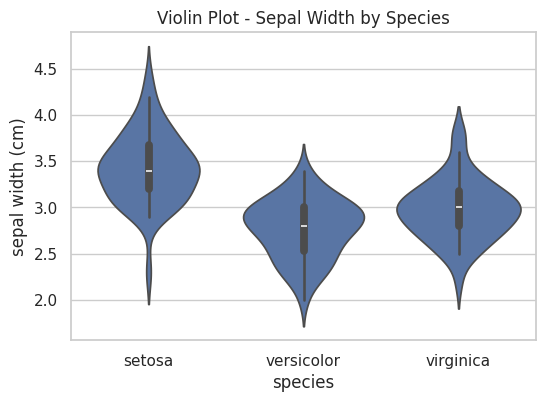

In [ ]:
# h) Violin Plot
plt.figure(figsize=(6,4))
sns.violinplot(x='species', y='sepal width (cm)', data=df)
plt.title('Violin Plot - Sepal Width by Species')
plt.show()

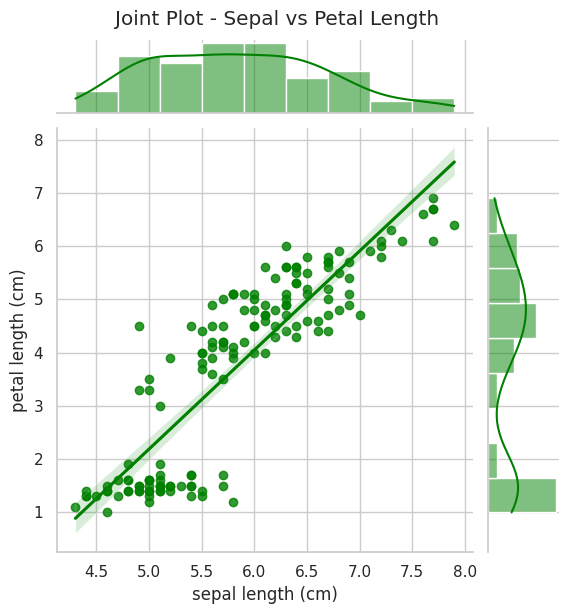

In [ ]:
# i) Joint Plot
sns.jointplot(x='sepal length (cm)', y='petal length (cm)', data=df, kind='reg', color='green')
plt.suptitle('Joint Plot - Sepal vs Petal Length', y=1.02)
plt.show()

/tmp/ipython-input-3561637864.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='species', y='petal width (cm)', data=df, palette='Set2')
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


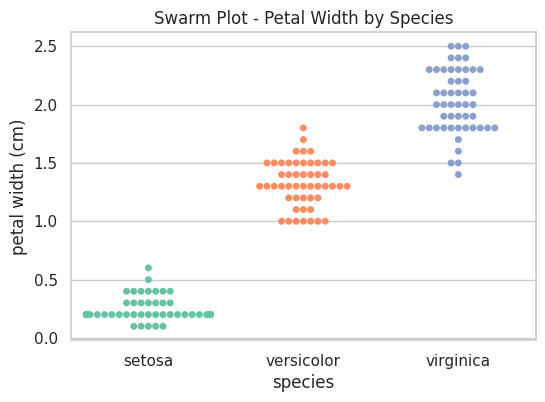

In [ ]:
# j) Swarm Plot
plt.figure(figsize=(6,4))
sns.swarmplot(x='species', y='petal width (cm)', data=df, palette='Set2')
plt.title('Swarm Plot - Petal Width by Species')
plt.show()

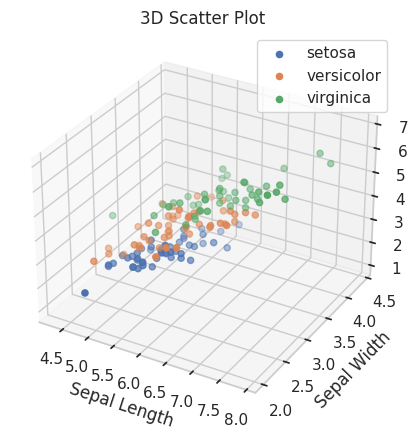

In [ ]:
# k) 3D Plot (Matplotlib)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
for species in df['species'].unique():
    subset = df[df['species'] == species]
    ax.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], subset['petal length (cm)'], label=species)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('3D Scatter Plot')
plt.legend()
plt.show()

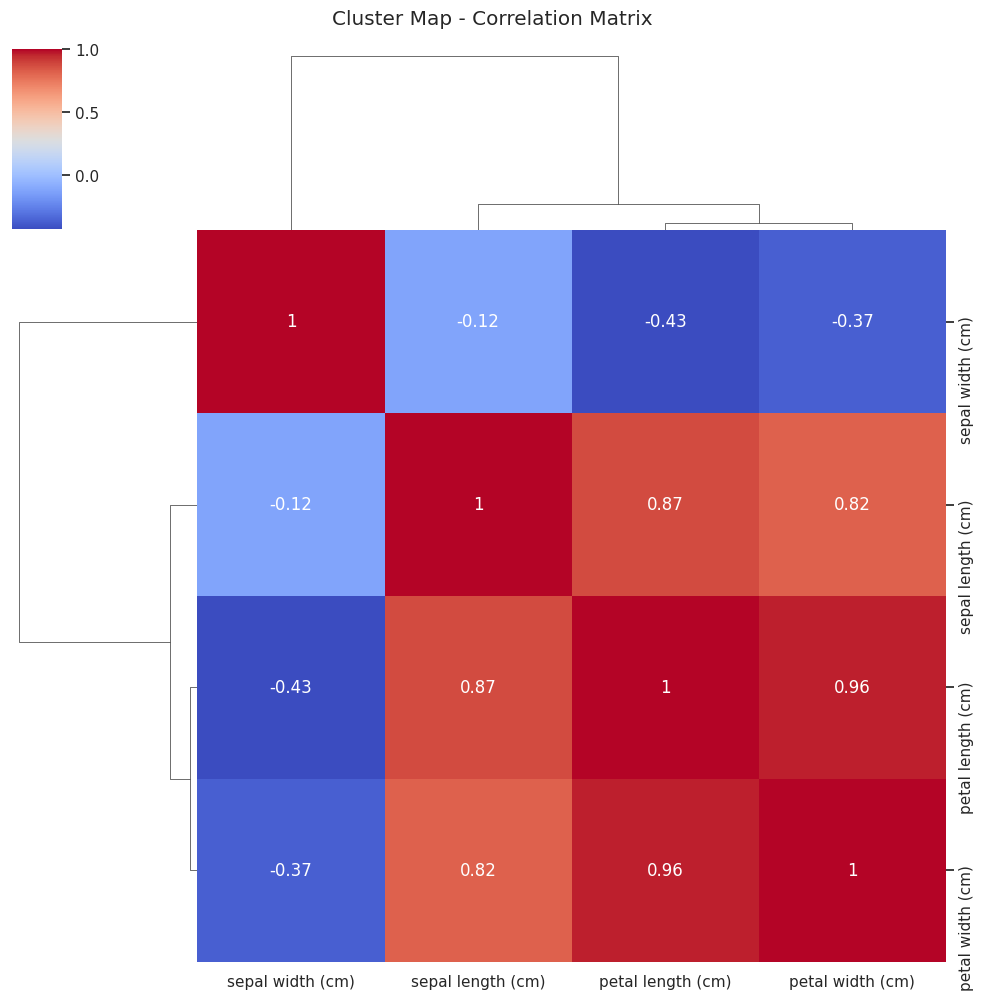

In [ ]:
# l) Pairwise Correlation Cluster Map
sns.clustermap(df.drop(columns='species').corr(), annot=True, cmap='coolwarm')
plt.suptitle('Cluster Map - Correlation Matrix', y=1.02)
plt.show()

In [ ]:
# m) Interactive Visualization (Plotly)
fig = px.scatter_3d(df, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)',
                    color='species', title='Interactive 3D Scatter Plot')
fig.show()

In [ ]:
# ------------------------------------------------------------
# Step 6: Analysis and Conclusion
# ------------------------------------------------------------
print("\nAnalysis:")
print("1. Setosa species generally has smaller petal and sepal lengths than Versicolor and Virginica.")
print("2. Correlation heatmap shows strong relation between petal length and petal width.")
print("3. Visualizations reveal clear class separability, especially in petal dimensions.")

print("\nConclusion:")
print("Data visualization using Python libraries helps easily identify patterns and relationships between variables, aiding data-driven insights.")


Analysis:
1. Setosa species generally has smaller petal and sepal lengths than Versicolor and Virginica.
2. Correlation heatmap shows strong relation between petal length and petal width.
3. Visualizations reveal clear class separability, especially in petal dimensions.

Conclusion:
Data visualization using Python libraries helps easily identify patterns and relationships between variables, aiding data-driven insights.
